## UAS Data Mining

- Nama: Ayesha Ali Firdaus
- NIM: 2101990
- Kelas: C2

In [45]:
# Import library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import pickle
import xgboost as xgb
import joblib

In [46]:
# Import Dataset
df_pangan = pd.read_csv("C:\\Users\\AYESHA ALI FIRDAUS\\Downloads\\dataset datmin\\ketidak_cukupan_pangan_prov.csv")
# alasan mengambil data set ini adalah untuk mendapatkan data harapan hidup

df_ilmu = pd.read_csv("C:\\Users\\AYESHA ALI FIRDAUS\\Downloads\\dataset datmin\\proporsi_perempuan_18_24_nikah_prov.csv")
# alasan mengambil data set ini karena berasusmsi jika wanita yang menikah di rentang umur tersebut tidak melanjutkan pendidikan di perguruan tinggi

df_kerja = pd.read_csv("C:\\Users\\AYESHA ALI FIRDAUS\\Downloads\\dataset datmin\\proporsi_kerja_informal_nonpertanian.csv")
# alasan mengambil data set ini karena dengan lapangan kerja dengan dominasi informal, maka dapat diasumsikan memiliki pendapatan yang tinggi

df_pmi  = pd.read_csv("C:\\Users\\AYESHA ALI FIRDAUS\\Downloads\\dataset datmin\\pmi.csv")

In [47]:
df_pangan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tahun                 175 non-null    int64  
 1   pct_tdk_cukup_pangan  175 non-null    float64
 2   prov                  175 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [48]:
df_ilmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tahun                245 non-null    int64  
 1   pct_perempuan_nikah  245 non-null    float64
 2   prov                 245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [49]:
df_kerja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tahun                                 245 non-null    int64  
 1   proporsi_kerja_informal_nonpertanian  245 non-null    float64
 2   prov                                  245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [50]:
# Cek apakah terdapat null
df_pangan.isnull().sum()

tahun                   0
pct_tdk_cukup_pangan    0
prov                    0
dtype: int64

In [51]:
# Cek apakah terdapat null
df_kerja.isnull().sum()

tahun                                   0
proporsi_kerja_informal_nonpertanian    0
prov                                    0
dtype: int64

In [52]:
# Cek apakah terdapat null
df_ilmu.isnull().sum()

tahun                  0
pct_perempuan_nikah    0
prov                   0
dtype: int64

## EDA

<AxesSubplot:xlabel='prov', ylabel='pct_tdk_cukup_pangan'>

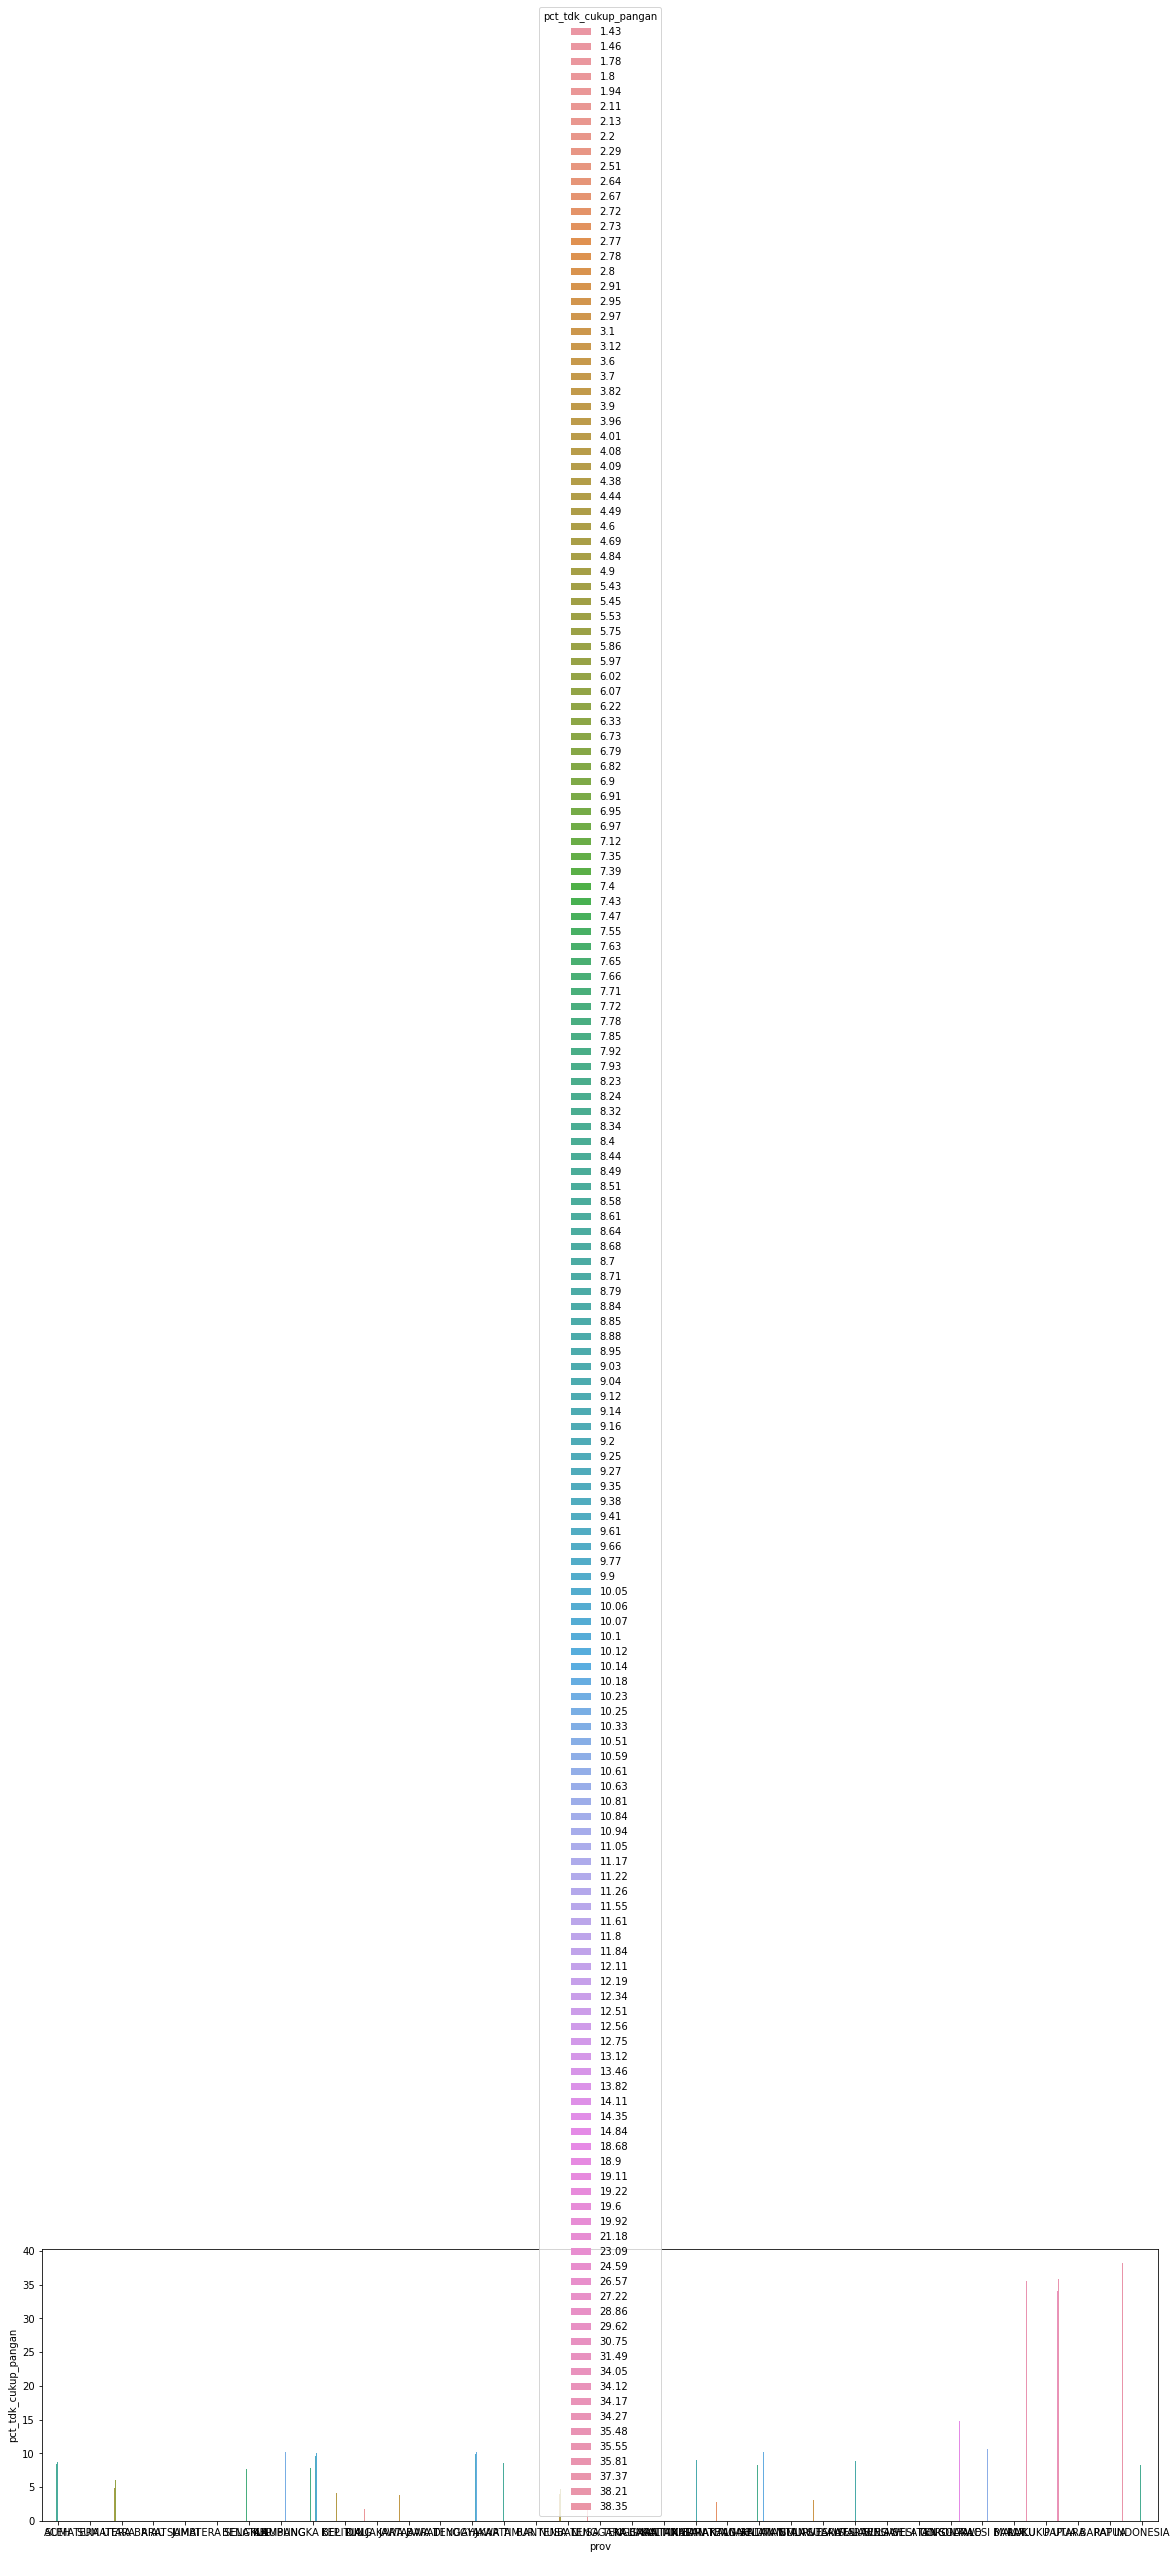

In [101]:
# Ingin mengetahui perkembangan kecukupan pangan dari tahun ke tahun
# df_temp = df_pangan[df_pangan.tahun == 2020].groupby(["prov"])["pct_tdk_cukup_pangan"]
fig, ax = plt.subplots(figsize=(20, 5)) # atur ukuran chart
sns.barplot(ax=ax, x="prov", y = "pct_tdk_cukup_pangan", hue="pct_tdk_cukup_pangan", data=df_pangan)

<AxesSubplot:xlabel='prov', ylabel='pct_tdk_cukup_pangan'>

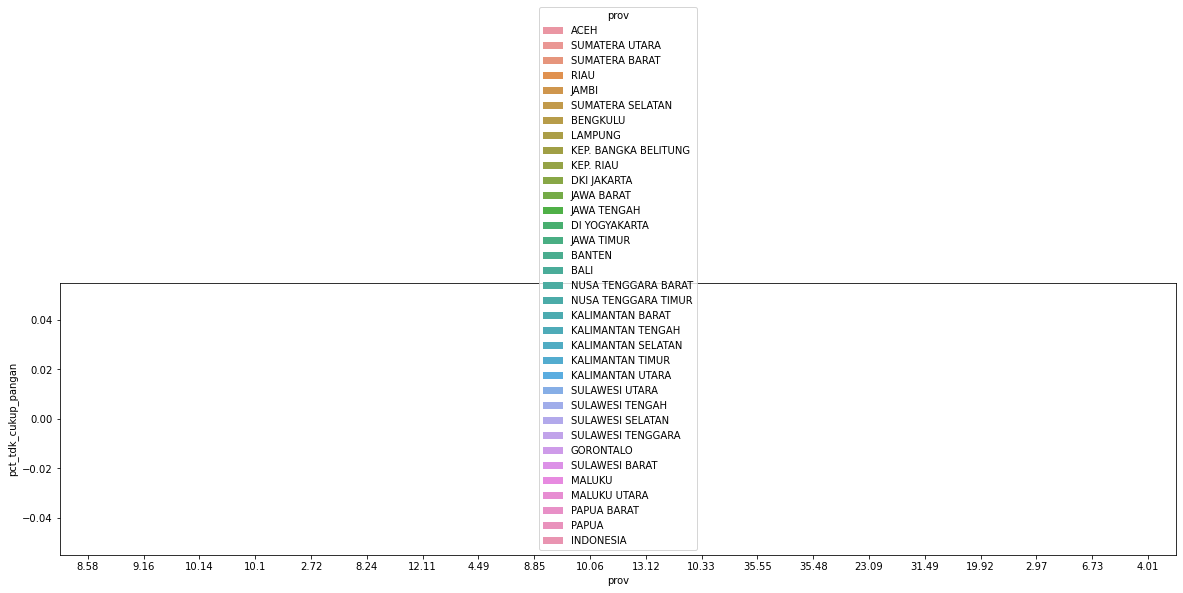

In [98]:

fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.barplot(ax=ax,x="prov",y="pct_tdk_cukup_pangan", hue="prov", data=df_pangan2020, order = df_pangan2020.pct_tdk_cukup_pangan.value_counts().iloc[:20].index)

In [61]:
# Proses menggabungkan semua data set
# Data set yang digunakan adalah data set tahun 2020 saja, karena semua dataset memiliki data untuk tahun 2020
df_pangan2020 = df_pangan.loc[(df_pangan.tahun == 2020)]
df_ilmu2020 = df_ilmu.loc[(df_ilmu.tahun == 2020)]
df_kerja2020 = df_kerja.loc[(df_kerja.tahun == 2020)]
df_pmi2020 = df_pmi.loc[(df_pmi.tahun == 2020)]

df_temp = pd.merge(df_pangan2020, df_ilmu2020, how='inner', on = 'prov')
df_temp = pd.merge(df_temp, df_kerja2020, how='inner', on = 'prov')
df_temp = df_temp.drop(["tahun_x", "tahun_y", "tahun"], axis = 1)
df_temp = pd.merge(df_temp, df_pmi2020, how='inner', on = 'prov')
df_temp = df_temp.drop(["tahun", "prov"], axis = 1)

df_temp.head(50)

,pct_tdk_cukup_pangan,pct_perempuan_nikah,proporsi_kerja_informal_nonpertanian,kategori_pmi
0,8.58,32.61,47.59,TINGGI
1,6.73,26.92,48.02,TINGGI
2,5.86,38.48,53.44,TINGGI
3,9.16,32.46,44.66,TINGGI
4,9.12,35.29,47.11,TINGGI
5,9.77,30.50,49.42,TINGGI
6,7.72,24.67,50.69,TINGGI
7,12.19,26.64,57.50,SEDANG
8,9.35,23.19,42.74,TINGGI
9,6.07,23.63,30.87,TINGGI


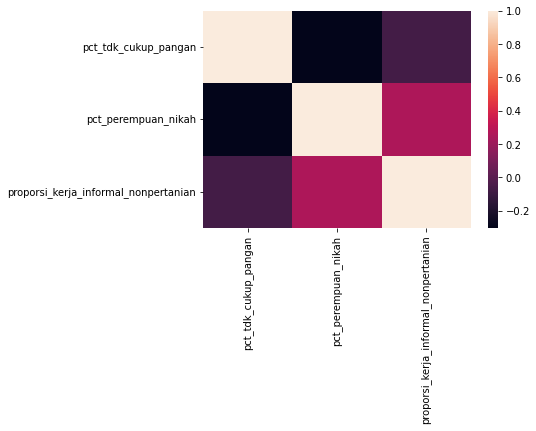

In [102]:
# Heat Map relasi antar data set
corr = df_temp[["pct_tdk_cukup_pangan","pct_perempuan_nikah","proporsi_kerja_informal_nonpertanian"]].corr()
ax = sns.heatmap(corr)

## Klasifikasi

In [66]:
# split data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

# Menentukan Kelas Target
le = preprocessing.LabelEncoder()
le.fit(df_temp.kategori_pmi)
Y = le.transform(df_temp.kategori_pmi)
X = df_temp.drop("kategori_pmi",axis=1)

In [67]:
# Mnejalankan Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)

# Mencetak hasil akurasi random forest
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.8571428571428571
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



In [68]:
# Menjalankan XGBoost
clf = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = "mlogloss", 
                        max_depth = 30, gamma=0.1, subsample = 0.9,learning_rate=0.1, 
                        n_estimators = 50, nthread=4)

clf.fit(X_train, Y_train)# PCA
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)

# Mencetak hasil dari XGBoost
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [69]:
# Untuk mengethaui atribut yang berperan dalam melakukan prediksi
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                                      importance
pct_tdk_cukup_pangan                    0.408581
proporsi_kerja_informal_nonpertanian    0.374471
pct_perempuan_nikah                     0.216948


In [70]:
# Mengeksport hasil model
# Karena akurasi dari XG boost yang paling besar, maka saya menggunakan model xgboost
joblib.dump(clf, "C:\\Users\\AYESHA ALI FIRDAUS\\DatMin\\xgboost_order_class.joblib")

['C:\\Users\\AYESHA ALI FIRDAUS\\DatMin\\xgboost_order_class.joblib']

## Prediksi

In [97]:
df1 = pd.read_csv("C:\\Users\\AYESHA ALI FIRDAUS\\Downloads\\dataset datmin\\persen_unmet_need_pelayanan_kesehatan.csv")
df2 = pd.read_csv("C:\\Users\\AYESHA ALI FIRDAUS\\Downloads\\dataset datmin\\persen_rumah_dgn_fasilitas_cuci_tangan_sabun.csv")
df3 = pd.read_csv("C:\\Users\\AYESHA ALI FIRDAUS\\Downloads\\dataset datmin\\persen_asupan_kalori_bawah_1400.csv")

df1 = df1.loc[(df1.tahun == 2019)]
df2 = df2.loc[(df2.tahun == 2019)]
df3 = df3.loc[(df3.tahun == 2019)]

df_temp2 = pd.merge(df1, df2, how='inner', on = 'prov')
df_temp2 = pd.merge(df_temp2, df3, how='inner', on = 'prov')
df_temp2 = df_temp2.drop(["tahun_x", "tahun_y", "tahun", "prov"], axis = 1)

df_temp2.head(50)

,persen_unmet_need_pelayanan_kesehatan,persen_rumah_dgn_fasilitas_cuci_tangan_sabun,persen_asupan_kalori_bawah_1400
0,4.36,63.998947,9.61
1,4.23,71.434749,6.06
2,3.28,78.801503,7.19
3,4.86,72.114493,10.20
4,4.57,71.465361,9.80
5,5.14,73.837171,6.97
6,5.33,77.814927,7.27
7,5.47,74.729711,9.99
8,3.69,85.349694,6.22
9,3.05,74.489285,8.48
